In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import random
import os

In [2]:
seed = 25
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

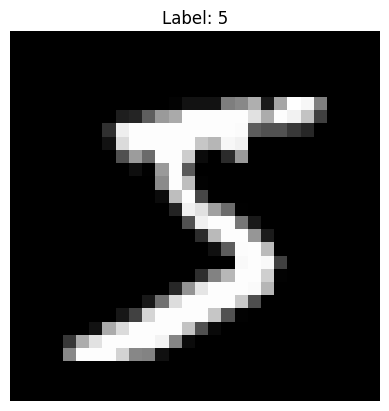

In [3]:
# Load MNIST from Keras datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [4]:
# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include channel dimension (batch, height, width, channels)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()

/Users/rohandas/Documents/GitHub/ML_Project/tfenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,314 (477.79 KB)

 Trainable params: 122,122 (477.04 KB)

 Non-trainable params: 192 (768.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose = 1
)

# Train with more epochs
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8857 - loss: 0.3765 - val_accuracy: 0.9848 - val_loss: 0.0530
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9765 - loss: 0.0811 - val_accuracy: 0.9878 - val_loss: 0.0466
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9833 - loss: 0.0576 - val_accuracy: 0.9882 - val_loss: 0.0503
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9900 - val_loss: 0.0413
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9880 - loss: 0.0405 - val_accuracy: 0.9893 - val_loss: 0.0471
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9900 - val_loss: 0.0445
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9903 - val_loss: 0.0492
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9911 - loss: 0.0285 - 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0402
Test accuracy: 0.9904


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0     0.9869    0.9980    0.9924       980
           1     0.9886    0.9956    0.9921      1135
           2     0.9941    0.9864    0.9903      1032
           3     0.9901    0.9941    0.9921      1010
           4     0.9868    0.9908    0.9888       982
           5     0.9933    0.9899    0.9916       892
           6     0.9969    0.9927    0.9948       958
           7     0.9874    0.9893    0.9883      1028
           8     0.9908    0.9897    0.9902       974
           9     0.9900    0.9772    0.9835      1009

    accuracy                         0.9904     10000
   macro avg     0.9905    0.9904    0.9904     10000
weighted avg     0.9904    0.9904    0.9904     10000



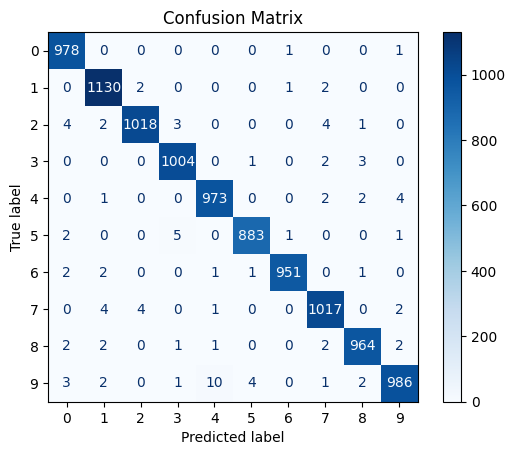

Accuracy for digit 0: 0.9980
Accuracy for digit 1: 0.9956
Accuracy for digit 2: 0.9864
Accuracy for digit 3: 0.9941
Accuracy for digit 4: 0.9908
Accuracy for digit 5: 0.9899
Accuracy for digit 6: 0.9927
Accuracy for digit 7: 0.9893
Accuracy for digit 8: 0.9897
Accuracy for digit 9: 0.9772


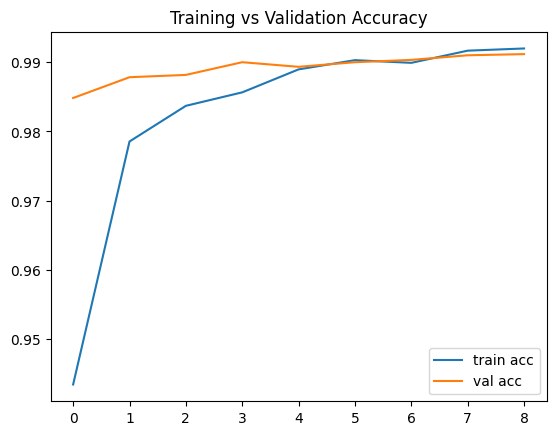

In [8]:
# Convert one-hot encoded labels back to integers
y_true = np.argmax(y_test, axis=1)

# Predict class probabilities
y_pred_proba = model.predict(x_test)

# Get predicted classes
y_pred = np.argmax(y_pred_proba, axis=1)

print(classification_report(y_true, y_pred, digits=4))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

correct = (y_true == y_pred)
for digit in range(10):
    idx = y_true == digit
    acc = np.mean(correct[idx])
    print(f"Accuracy for digit {digit}: {acc:.4f}")

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()